In [16]:
from pycaret.classification import *

In [8]:
# importing pandas to read the CSV file
import pandas as pd
# read the data
data_classification = pd.read_csv('train.csv')
# view the top rows of the data
data_classification.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
from pycaret import classification
# setup the environment 
classification_setup = classification.setup(data= data_classification,ignore_features=['ID'], target='Is_Lead',
                                            categorical_iterative_imputer='nb',transformation=True,
                                            log_experiment = True, experiment_name = 'diamond',use_gpu=True)

,Description,Value
0,session_id,8732
1,Target,Is_Lead
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(245725, 11)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
classification.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [5]:
classification_lgbm = classification.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8575,0.8694,0.5392,0.7921,0.6416,0.5566,0.5727
1,0.8637,0.8777,0.5468,0.8166,0.6550,0.5742,0.5921
2,0.8628,0.8774,0.5581,0.8020,0.6582,0.5758,0.5906
3,0.8603,0.8743,0.5494,0.7975,0.6506,0.5669,0.5823
4,0.8645,0.8758,0.5636,0.8055,0.6632,0.5817,0.5962
5,0.8590,0.8764,0.5464,0.7935,0.6472,0.5628,0.5781
6,0.8595,0.8719,0.5440,0.7982,0.6470,0.5632,0.5793
7,0.8636,0.8772,0.5463,0.8167,0.6547,0.5738,0.5919
8,0.8592,0.8727,0.5352,0.8047,0.6429,0.5596,0.5776
9,0.8592,0.8728,0.5311,0.8082,0.6410,0.5580,0.5770


In [48]:
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8627,0.8700,0.5665,0.7976,0.6625,0.5794,0.5928
1,0.8614,0.8723,0.5597,0.7970,0.6576,0.5740,0.5881
2,0.8565,0.8669,0.5531,0.7795,0.6470,0.5602,0.5732
3,0.8551,0.8702,0.5465,0.7779,0.6420,0.5546,0.5682
4,0.8593,0.8706,0.5611,0.7857,0.6547,0.5694,0.5821
5,0.8601,0.8746,0.5531,0.7965,0.6528,0.5688,0.5836
6,0.8586,0.8693,0.5544,0.7883,0.6510,0.5657,0.5795
7,0.8594,0.8700,0.5499,0.7958,0.6504,0.5660,0.5812
8,0.8624,0.8809,0.5636,0.7987,0.6608,0.5778,0.5916
9,0.8572,0.8707,0.5560,0.7804,0.6493,0.5628,0.5756


In [47]:
classification_cb = classification.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8630,0.8735,0.5597,0.8049,0.6602,0.5779,0.5929
1,0.8617,0.8742,0.5467,0.8099,0.6528,0.5704,0.5876
2,0.8570,0.8675,0.5430,0.7898,0.6436,0.5579,0.5733
3,0.8583,0.8730,0.5462,0.7933,0.6470,0.5620,0.5774
4,0.8597,0.8733,0.5567,0.7912,0.6536,0.5689,0.5827
5,0.8609,0.8756,0.5447,0.8075,0.6506,0.5678,0.5850
6,0.8597,0.8716,0.5490,0.7982,0.6505,0.5665,0.5820
7,0.8600,0.8735,0.5433,0.8045,0.6486,0.5652,0.5822
8,0.8630,0.8834,0.5518,0.8116,0.6570,0.5752,0.5919
9,0.8588,0.8737,0.5511,0.7920,0.6499,0.5651,0.5796


In [49]:
# build and tune the catboost model
tune_lgbm = classification.tune_model(classification_lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8636,0.8739,0.5521,0.8143,0.6580,0.5767,0.5937
1,0.8633,0.8735,0.5386,0.8260,0.6521,0.5717,0.5919
2,0.8576,0.8673,0.5306,0.8040,0.6393,0.5552,0.5738
3,0.8572,0.8719,0.5379,0.7954,0.6418,0.5567,0.5733
4,0.8610,0.8724,0.5482,0.8050,0.6522,0.5692,0.5857
5,0.8615,0.8751,0.5357,0.8191,0.6477,0.5662,0.5859
6,0.8598,0.8711,0.5436,0.8035,0.6485,0.5650,0.5818
7,0.8590,0.8726,0.5328,0.8091,0.6425,0.5593,0.5782
8,0.8629,0.8832,0.5413,0.8212,0.6525,0.5716,0.5908
9,0.8591,0.8731,0.5421,0.8012,0.6466,0.5627,0.5795


In [18]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8613,0.8745,0.5534,0.7989,0.6538,0.5706,0.5857,9.3630
lightgbm,Light Gradient Boosting Machine,0.8609,0.8746,0.5460,0.8035,0.6501,0.5673,0.5838,2.8660
gbc,Gradient Boosting Classifier,0.8606,0.8733,0.5355,0.8115,0.6451,0.5629,0.5817,24.4100
xgboost,Extreme Gradient Boosting,0.8604,0.8723,0.5597,0.7891,0.6549,0.5705,0.5837,2.5700
ada,Ada Boost Classifier,0.8562,0.8663,0.5087,0.8140,0.6260,0.5428,0.5658,6.0070
lr,Logistic Regression,0.8546,0.8586,0.4782,0.8378,0.6089,0.5276,0.5589,1.9690
lda,Linear Discriminant Analysis,0.8506,0.8578,0.4489,0.8484,0.5871,0.5062,0.5445,1.7910
ridge,Ridge Classifier,0.8484,0.0000,0.4364,0.8505,0.5768,0.4959,0.5369,0.2270
svm,SVM - Linear Kernel,0.8477,0.0000,0.4432,0.8365,0.5794,0.4969,0.5344,0.6560
knn,K Neighbors Classifier,0.8431,0.8210,0.5697,0.7101,0.6322,0.5340,0.5392,24.9670


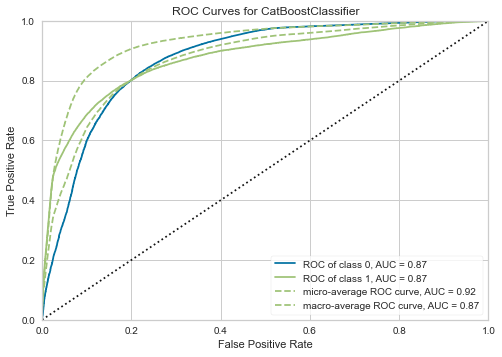

In [20]:
plot_model(best, plot = 'auc')

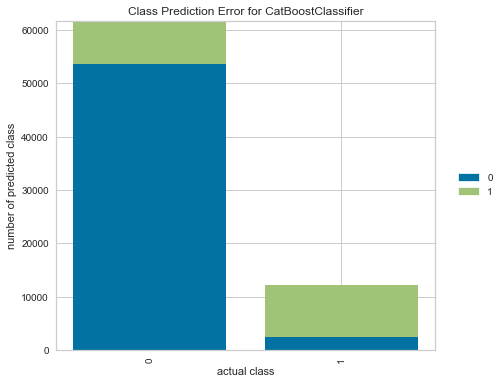

In [25]:
plot_model(best, plot = 'error')

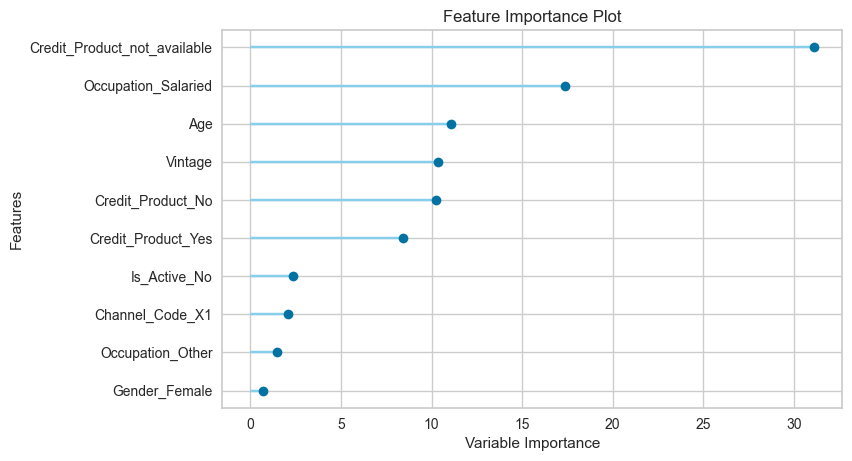

In [21]:
plot_model(best, plot = 'feature')

In [22]:
classification.evaluate_model(best)

,Parameters
nan_mode,Min
gpu_ram_part,0.95
eval_metric,Logloss
iterations,1000
leaf_estimation_method,Newton
observations_to_bootstrap,TestOnly
grow_policy,SymmetricTree
boosting_type,Plain
feature_border_type,GreedyLogSum
bayesian_matrix_reg,0.10000000149011612


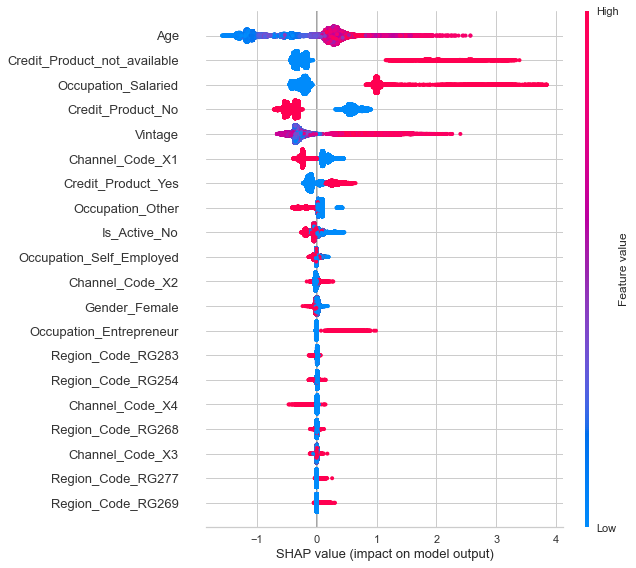

In [23]:
classification.interpret_model(best)

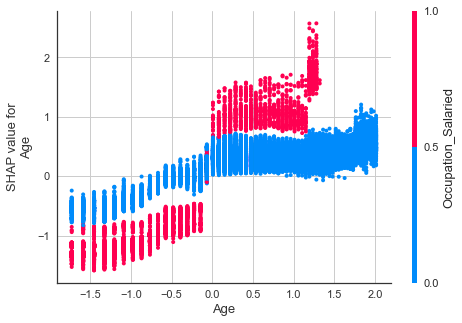

In [24]:
# interpret model : Correlation
classification.interpret_model(best,plot='correlation')

# Finalize and Save Pipeline

In [27]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'E://Hackathon//Job-A-Thon 2//diamond-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['ID'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Is_Lead',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Is_Lead')),
                 ('fix_perfect', Remove_100(target='Is_Lead')),
                 ('clean_names'

# Deployment

In [ ]:
!mlflow ui